In [36]:
###Linear Regression
!pip install opencv-python

You should consider upgrading via the 'c:\users\akash\anaconda3\python.exe -m pip install --upgrade pip' command.


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [6]:
#get the training data
dfx = pd.read_csv('./data/linearX.csv')
dfy = pd.read_csv('./data/linearY.csv')
dfx = dfx.values
dfy = dfy.values

x = dfx.reshape((-1,))
y = dfy.reshape((-1,))
print(x.shape)

(99,)


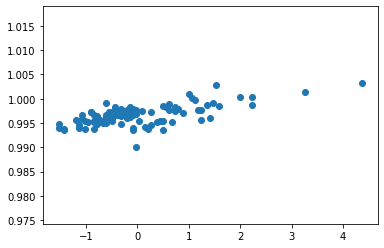

In [7]:
##Data PReprocessing and Visualization
#normalization
x = (x-x.mean())/x.std()
y = y;

plt.scatter(x,y)
plt.show()



In [8]:
##Gradient Descent


In [9]:
def hypothesis (x,theta):
    return theta[0] + theta[1]*x

In [22]:
def error(x,y,theta):
    err=0
    for i in range(x.shape[0]):
        hx = hypothesis(x[i],theta)
        err+= (hx-y[i])**2
    return err

In [23]:
def gradient(x,y,theta):
    grad = np.zeros((2,))
    m=x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i], theta)
        grad[0]+= (hx-y[i])
        grad[1]+= (hx-y[i])*x[i]
    
    return grad

In [26]:
def gradientDescent(x,y,learning_rate=0.001):
    #random theta
    theta = np.array([-2.0,0.0])
    max_iteration = 100
    itr = 0
    error_list = []
    theta_list = []
    while (itr<=max_iteration):
        grad = gradient(x,y,theta)
        err = error(x,y,theta)
        error_list.append(err)
        
        theta[0] -= learning_rate*grad[0]
        theta[1] -= learning_rate*grad[1]
        theta_list.append(theta)
        itr+=1
        
    return theta, error_list, theta_list

In [27]:
final_theta, error_list, theta_list = gradientDescent(x,y)

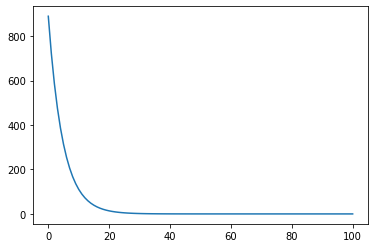

In [28]:
plt.plot(error_list)

In [29]:
print(final_theta)

[0.996554  0.0013579]


In [30]:
xtest  = np.linspace(-2,6,10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


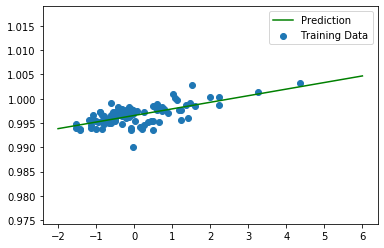

In [34]:
plt.scatter(x,y,label='Training Data')
plt.plot(xtest,hypothesis(xtest,final_theta), color = 'green', label = 'Prediction')
plt.legend()
plt.show()